In [43]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head(20)

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0    0     0.603610      -7.636942      0.023500         0.000005   
1    1     0.639451     -16.267598      0.071520         0.444929   
2    2     0.514538     -15.953575      0.110715         0.173699   
3    3     0.734463      -1.357000      0.052965         0.001651   
4    4     0.532968     -13.056437      0.023500         0.068687   
5    5     0.594579     -11.715431      0.101701         0.000005   
6    6     0.714958      -8.809725      0.023500         0.471139   
7    7     0.703726     -10.482610      0.037751         0.115727   
8    8     0.455598      -1.357000      0.162537         0.173626   
9    9     0.431498      -5.935425      0.023500         0.439565   
10  10     0.648327      -6.281786      0.080159         0.129619   
11  11     0.510435      -6.819409      0.110513         0.124467   
12  12     0.744160     -10.716773      0.053341         0.420525   
13  13     0.554932      -1.357000      0.023500         0.717686   
14  14     0.642559      -1.357000      0.043926         0.494930   
15  15     0.461757      -9.095550      0.061914         0.347827   
16  16     0.603939      -1.357000      0.084499         0.879365   
17  17     0.529631      -1.357000      0.120715         0.290918   
18  18     0.817260      -1.357000      0.119916         0.148958   
19  19     0.652836      -8.176578      0.053801         0.247030   

    InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0            0.000001                   0.051385   0.409866      290715.6450   
1            0.349414                   0.170522   0.651010      164519.5174   
2            0.453814                   0.029576   0.423865      174495.5667   
3            0.159717                   0.086366   0.278745      225567.4651   
4            0.000001                   0.331345   0.477769      213960.6789   
5            0.259634                   0.024300   0.639254      161012.2221   
6            0.000001                   0.356775   0.724783      243432.5794   
7            0.000001                   0.024300   0.773899      293848.8919   
8            0.000001                   0.288465   0.651137      271215.8237   
9            0.184462                   0.114921   0.025600      222030.4794   
10           0.132923                   0.274746   0.715141      258404.0353   
11           0.042339                   0.371490   0.025600      243868.4922   
12           0.000001                   0.056637   0.978000      153071.0495   
13           0.263840                   0.226782   0.446522      272376.6960   
14           0.263658                   0.258468   0.487598      208862.8859   
15           0.000001                   0.024300   0.484563      221432.5792   
16           0.069489                   0.024300   0.456734      308900.6612   
17           0.037863                   0.289522   0.340016      243347.5908   
18           0.000001                   0.236526   0.681689      253062.5039   
19           0.000001                   0.262854   0.650135      297517.9644   

      Energy  BeatsPerMinute  
0   0.826267       147.53020  
1   0.145400       136.15963  
2   0.624667        55.31989  
3   0.487467       147.91212  
4   0.947333        89.58511  
5   0.938333       151.43602  
6   0.336800       151.63439  
7   0.722000       123.31545  
8   0.947267       133.59806  
9   0.950867       117.39790  
10  0.359400       131.35937  
11  0.739267       132.55244  
12  0.058267       137.28701  
13  0.441600       143.72538  
14  0.879267       145.92435  
15  0.904667       119.94727  
16  0.735667       151.17802  
17  0.472467        95.88081  
18  0.847333       103.48320  
19  0.557533        86.07513

In [4]:
train_df.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257587       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [6]:
train_df.shape

(524164, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [16]:
target = 'BeatsPerMinute'

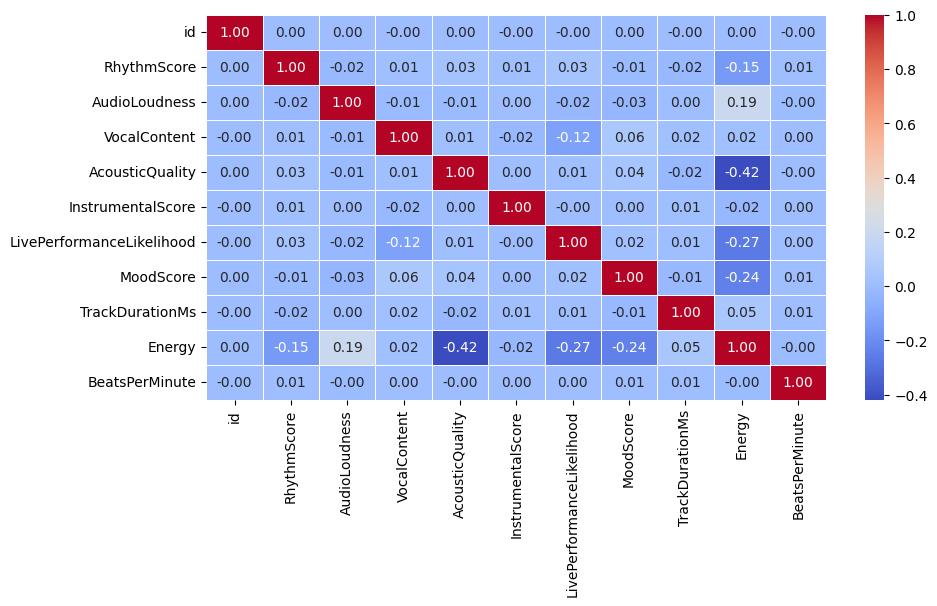

In [10]:
#since we are working with all float values, we can start by checking for multicollinearity
#build correlation matrix to evaluate any confounding variables
corr_matrix = train_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [11]:
#set numerical columns for looping
num_cols = train_df.drop('id',axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()

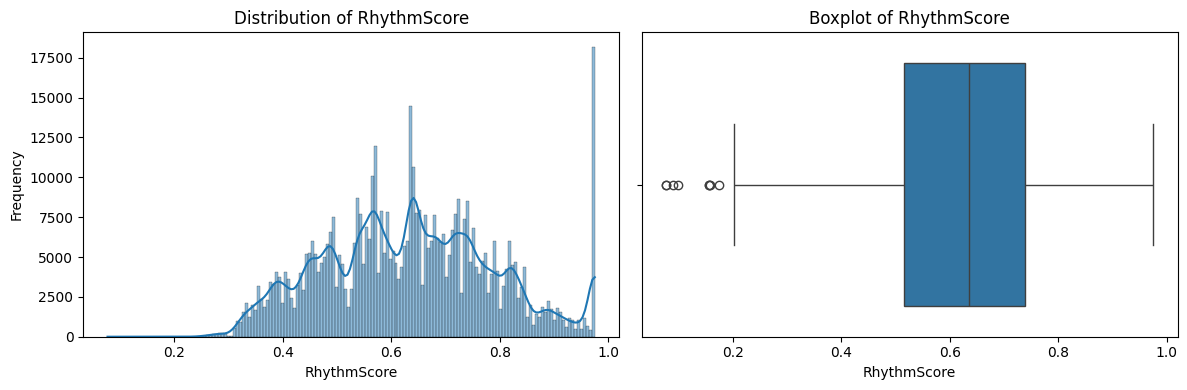

Sknewness of RhythmScore: 0.16815460162405227


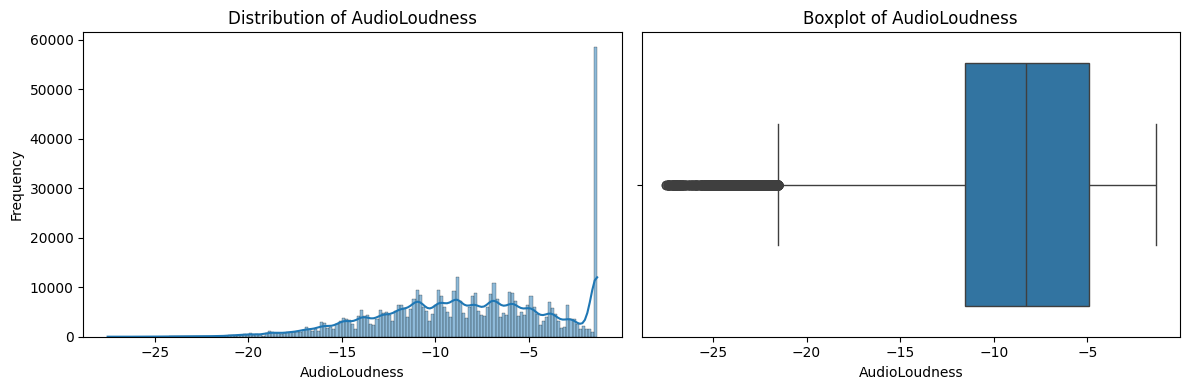

Sknewness of AudioLoudness: -0.3085135538208749


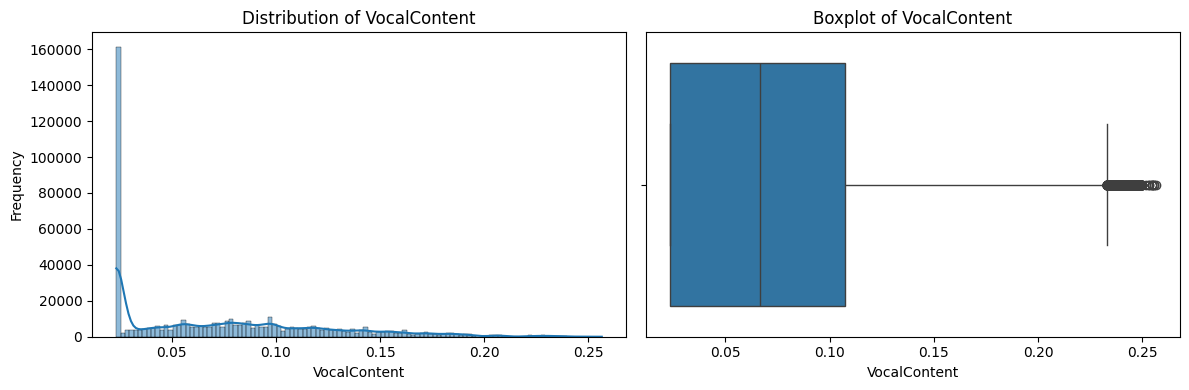

Sknewness of VocalContent: 0.7891115667629388


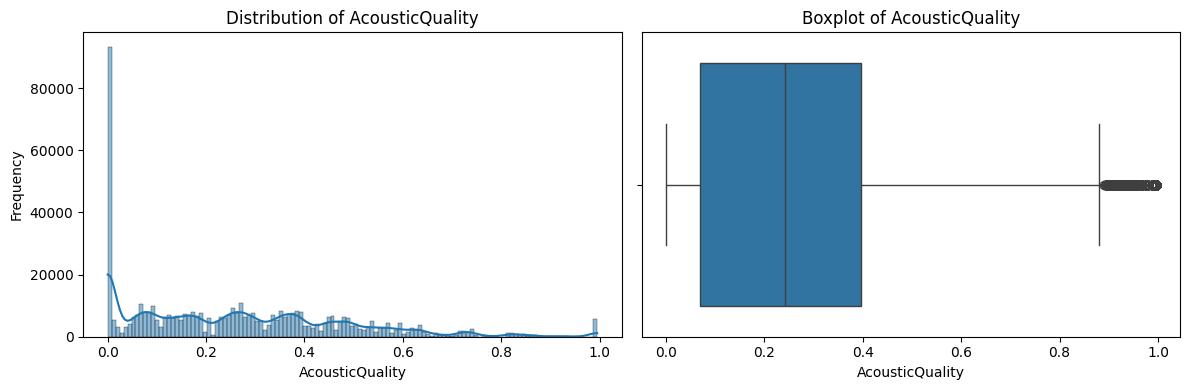

Sknewness of AcousticQuality: 0.7859655033153735


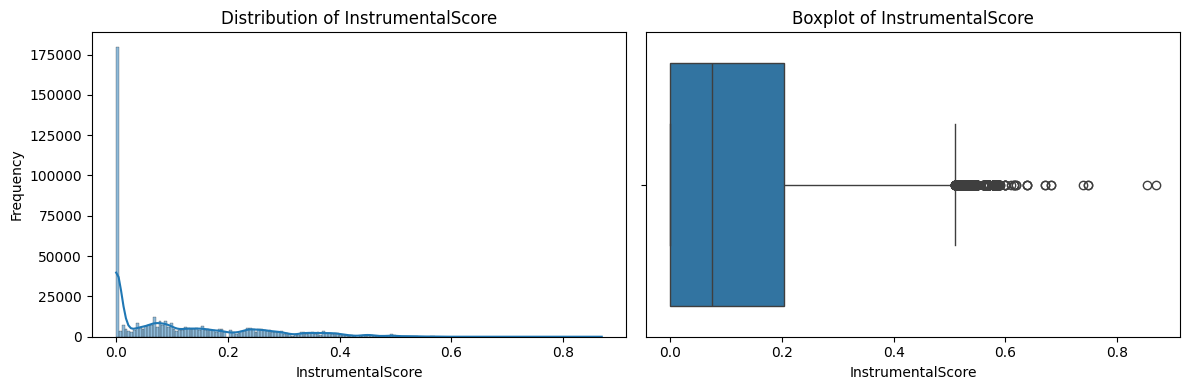

Sknewness of InstrumentalScore: 1.0362852452656723


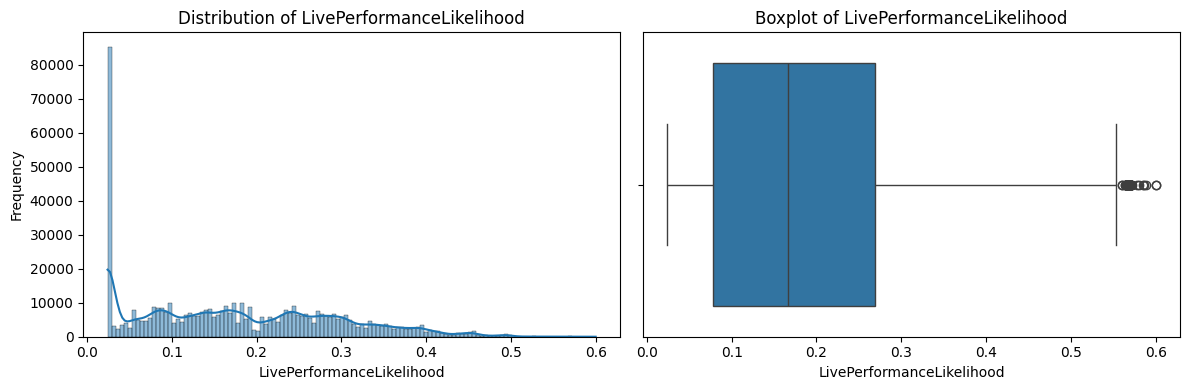

Sknewness of LivePerformanceLikelihood: 0.39332167424031617


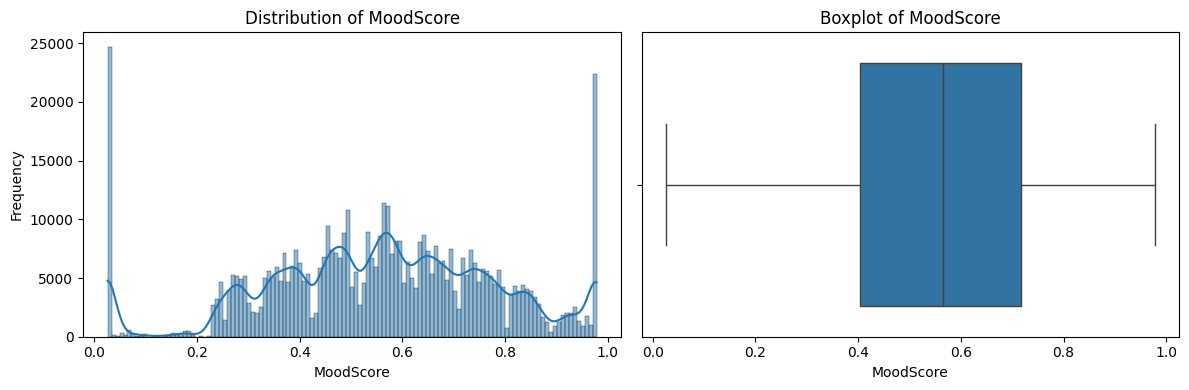

Sknewness of MoodScore: -0.2688198070468458


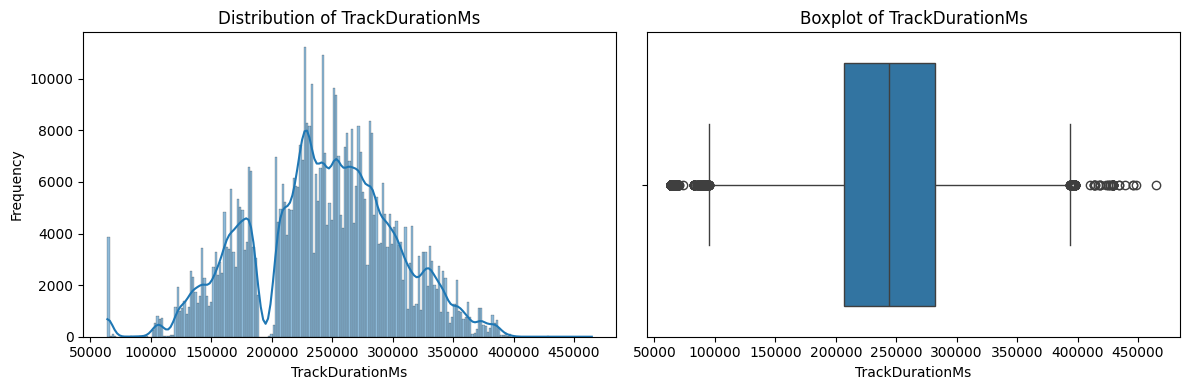

Sknewness of TrackDurationMs: -0.19048287149792312


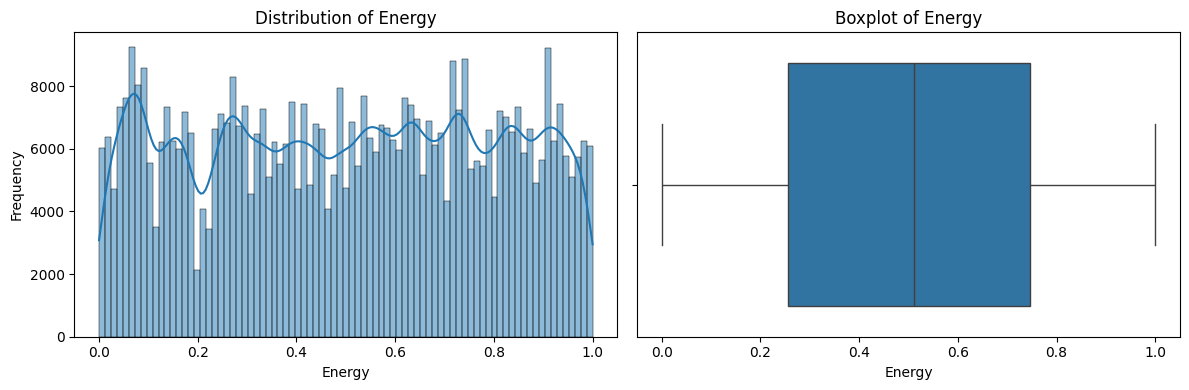

Sknewness of Energy: -0.030343541942763792


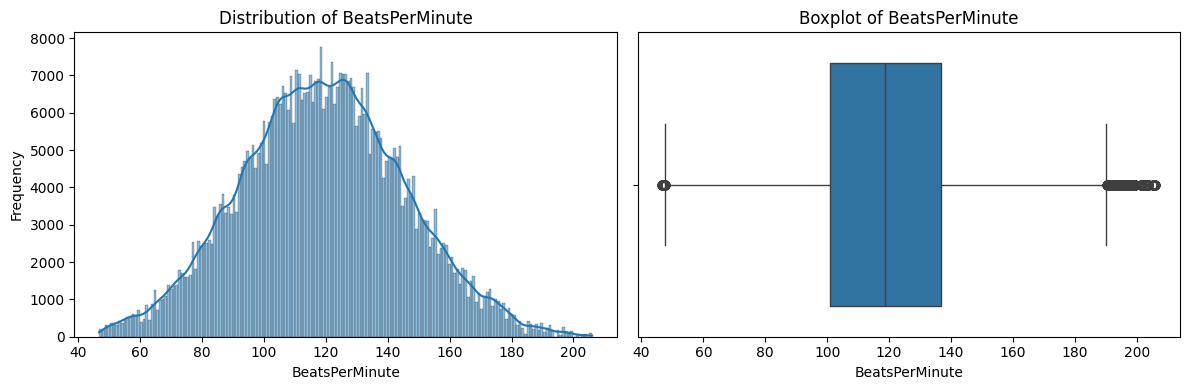

Sknewness of BeatsPerMinute: 0.07154986777030105


In [15]:
#check distribution and outliers for each numerical column
for col in num_cols:
    plt.figure(figsize=(12,4))
    #distribution
    plt.subplot(1,2,1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    #outlier check
    plt.subplot(1,2,2)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()
    plt.close()
    print(f'Sknewness of {col}: {train_df[col].skew()}')


In [51]:
#check outliers counts using IQR method
for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')

Number of outliers in RhythmScore: 8
Number of outliers in AudioLoudness: 1770
Number of outliers in VocalContent: 1245
Number of outliers in AcousticQuality: 6746
Number of outliers in InstrumentalScore: 2845
Number of outliers in LivePerformanceLikelihood: 129
Number of outliers in MoodScore: 0
Number of outliers in TrackDurationMs: 4267
Number of outliers in Energy: 0
Number of outliers in BeatsPerMinute: 2141


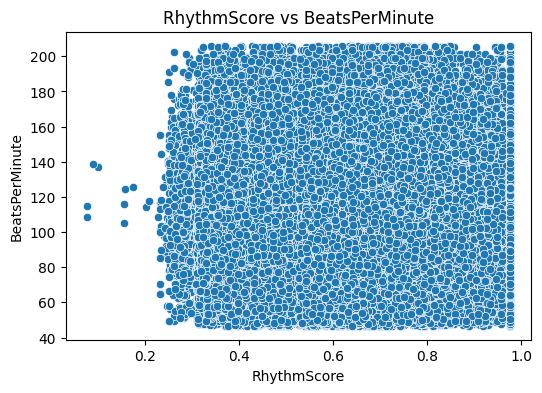

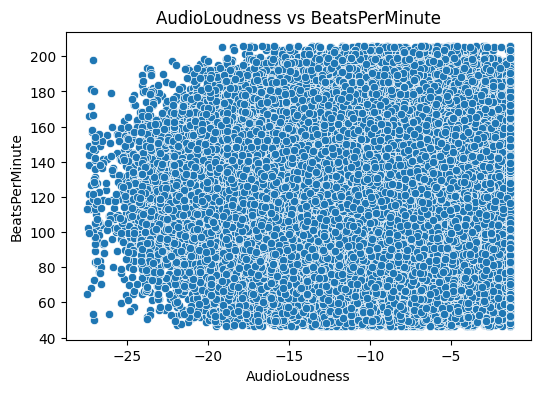

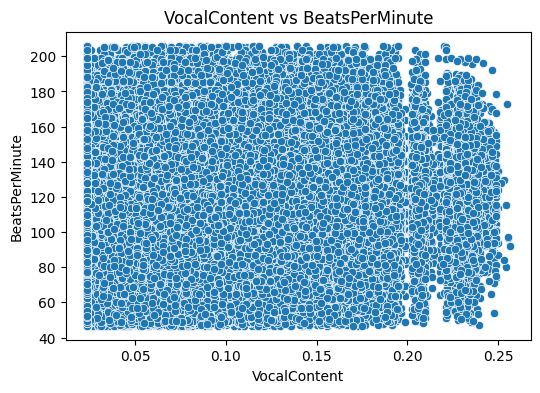

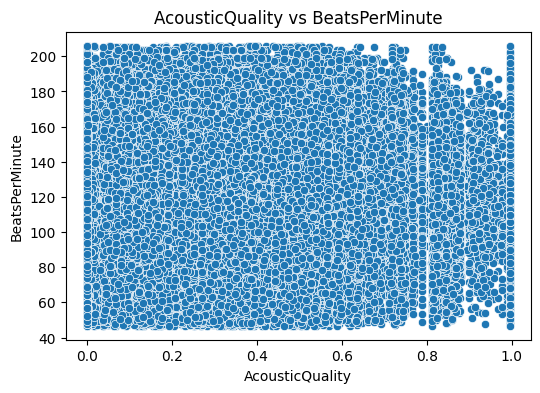

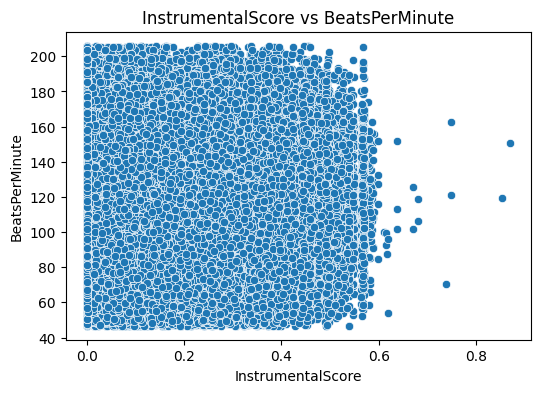

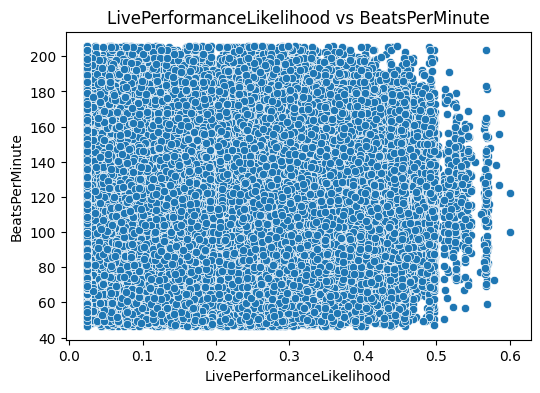

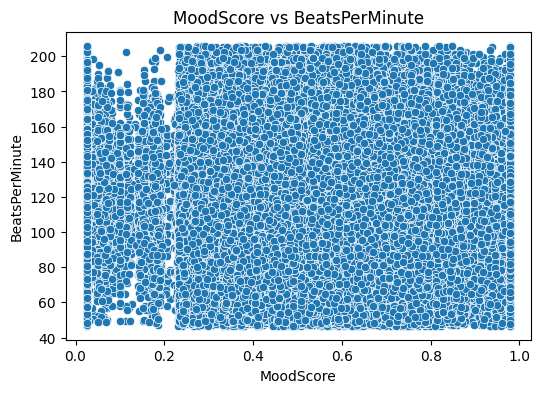

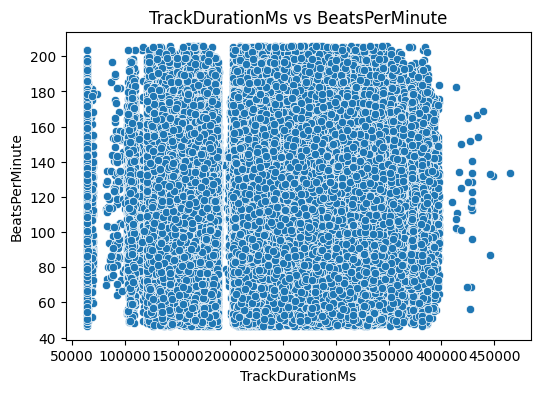

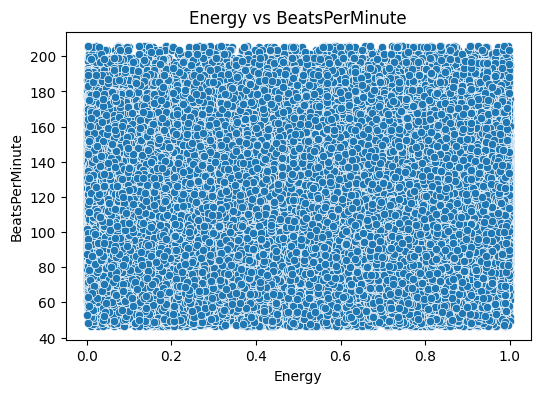

In [17]:
#check relationship for features with target variable
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=train_df[col], y=train_df[target])
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()
        plt.close()

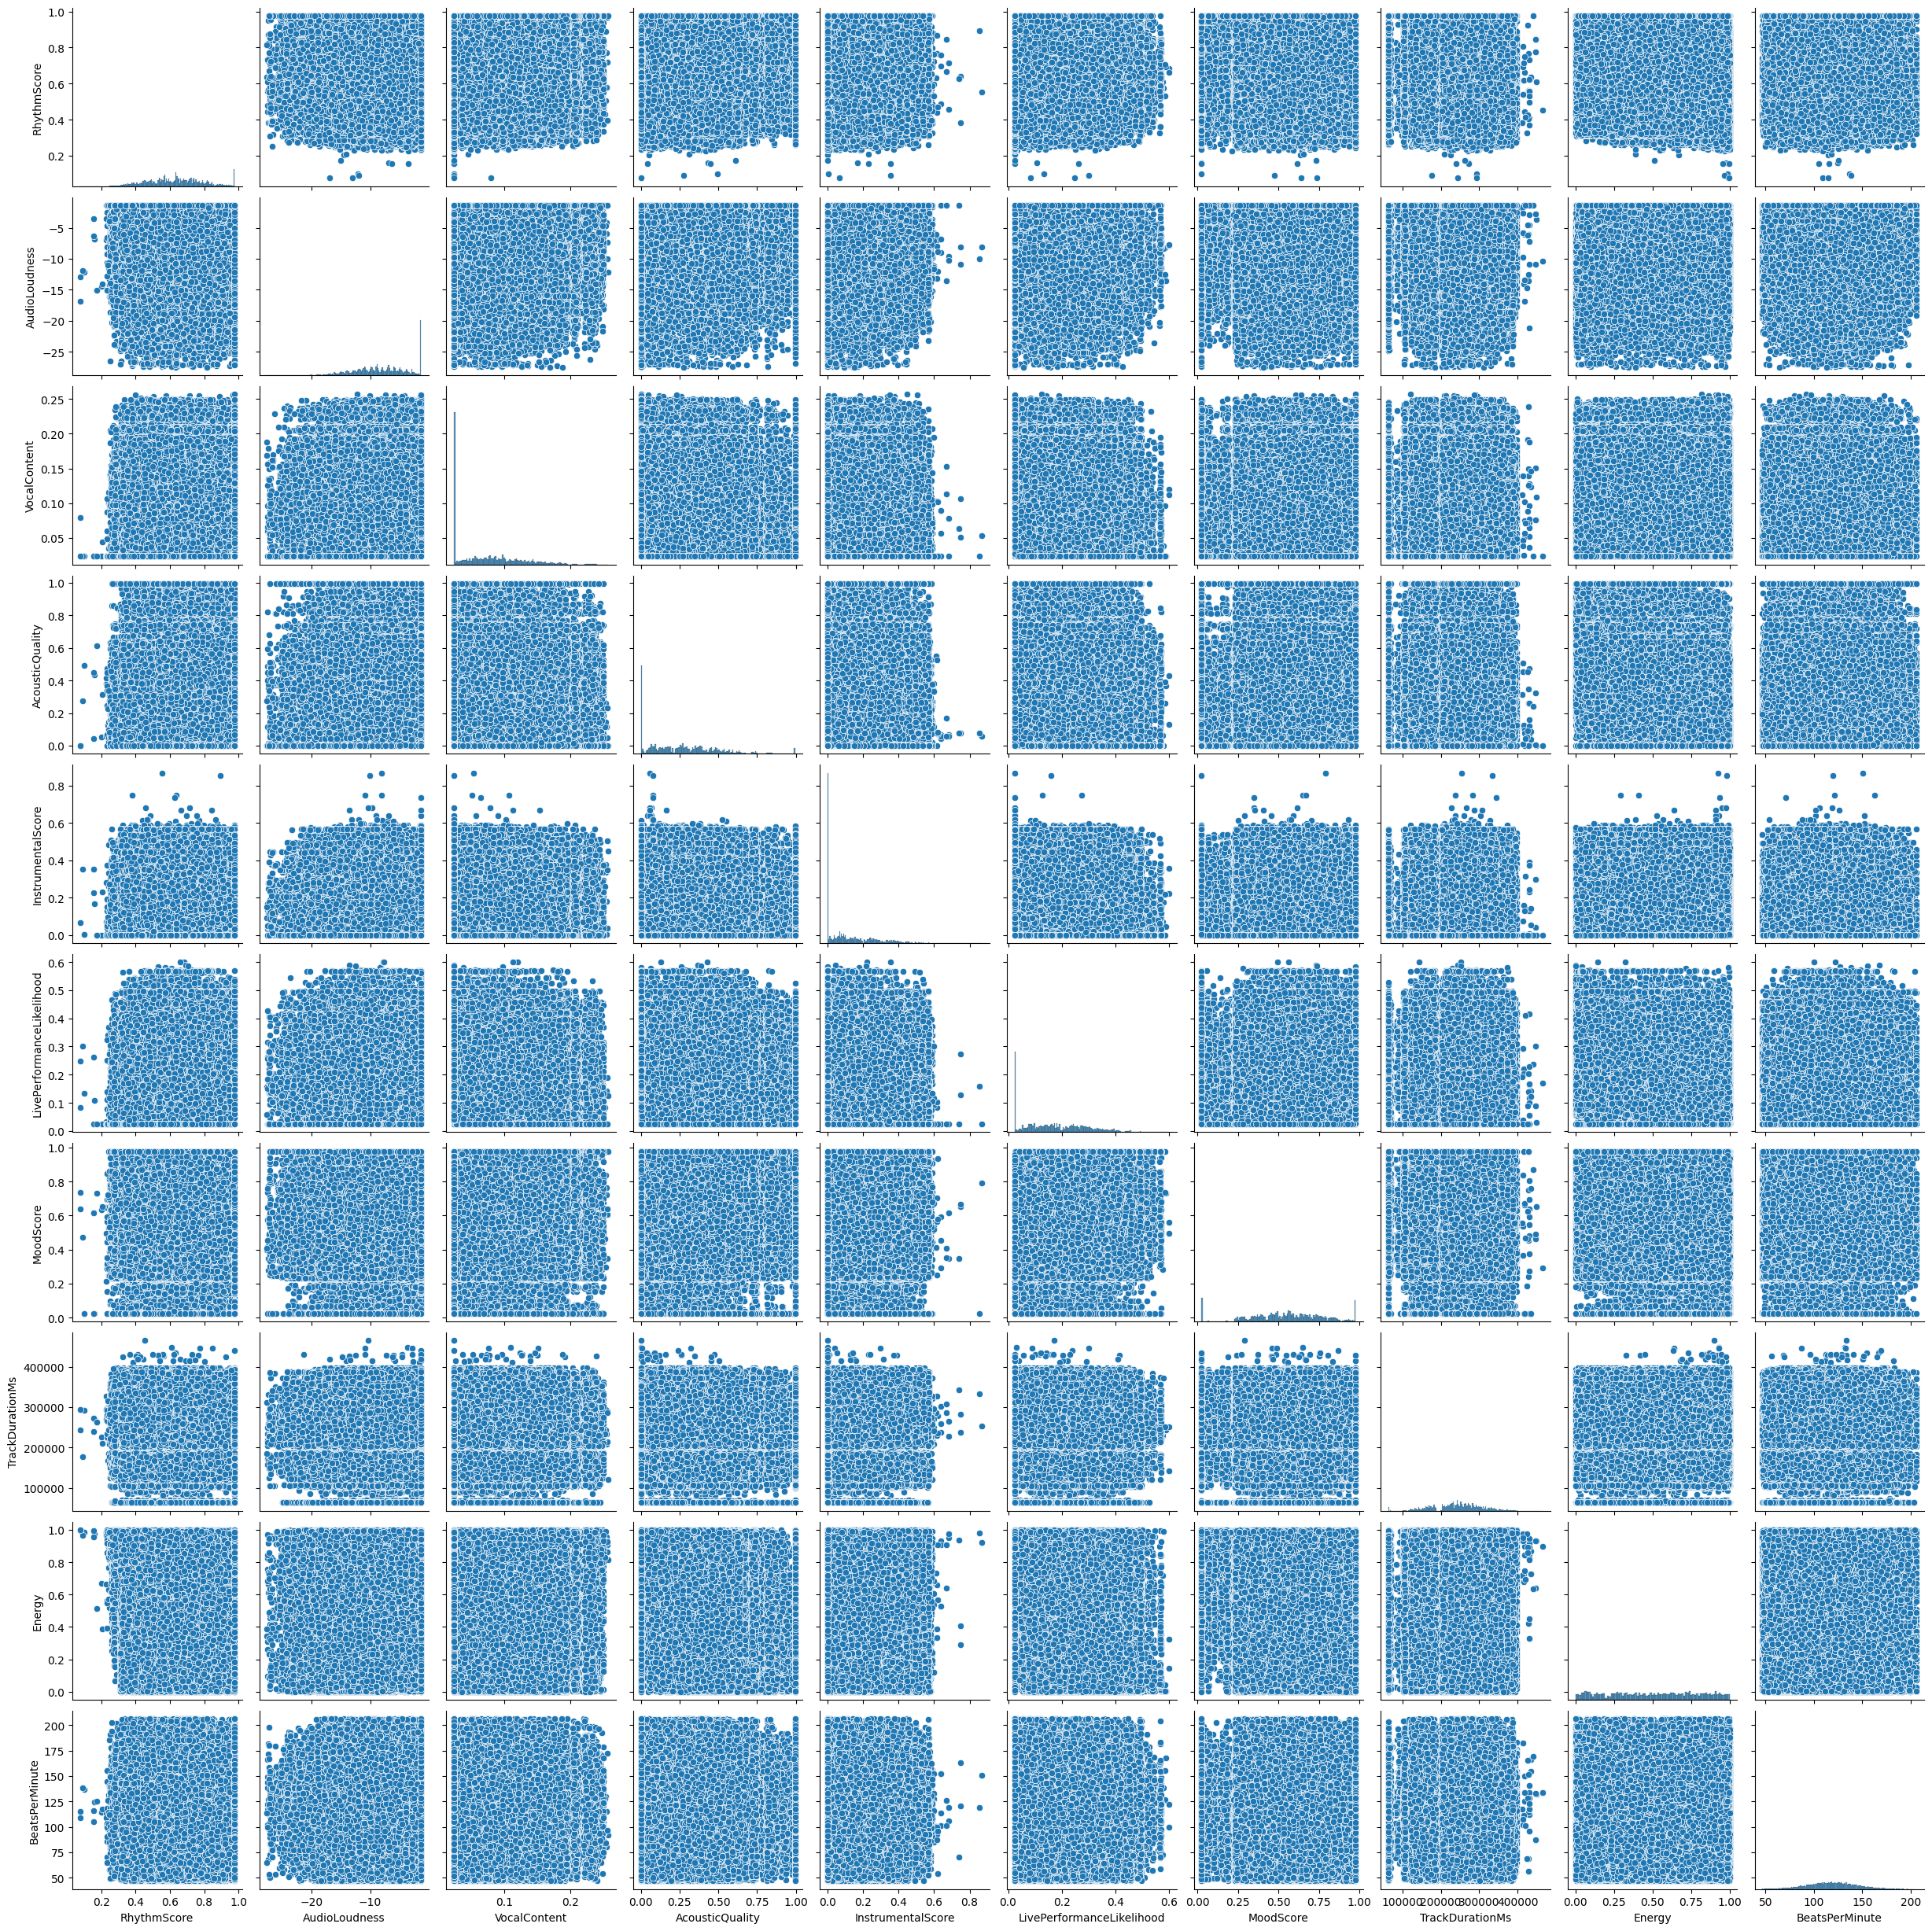

In [18]:
#pairplot to check for interactions
sns.pairplot(train_df[num_cols])

In [27]:
#check vif for multicollinearity
vif1 = train_df.drop(columns=['id',target],axis=1)
vif2 = add_constant(vif1)

vif3 = pd.DataFrame()
vif3['Feature'] = vif2.columns
vif3['VIF'] = [variance_inflation_factor(vif2.values, i) for i in range(vif2.shape[1])]

print(vif3)


                     Feature        VIF
0                      const  71.280673
1                RhythmScore   1.026997
2              AudioLoudness   1.047485
3               VocalContent   1.019630
4            AcousticQuality   1.247175
5          InstrumentalScore   1.001096
6  LivePerformanceLikelihood   1.112631
7                  MoodScore   1.079242
8            TrackDurationMs   1.003394
9                     Energy   1.518756


In [28]:
#split data into train/test
X = train_df.drop(columns=['id',target],axis=1)
y = train_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#baseline multi linear regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
multi_lr = LinearRegression()

multi_lr.fit(X_train_scaled, y_train)

y_pred_lr = multi_lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(rmse_lr)

#test ridge regularization
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_scaled, y_train)

rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))

print(rmse_ridge)

#test lasso regularization
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))

print(rmse_lasso)

#test elastic net regularizaion
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X_train_scaled, y_train)

rmse_en = np.sqrt(mean_squared_error(y_test, elastic_net.predict(X_test_scaled)))

print(rmse_en)

26.443879848299762
26.44387984586556
26.444451194705593
26.444015331420292


In [40]:
#rf baseline
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(rmse_rf)

26.67907617266901


In [42]:
#xgboost baseline

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(rmse_xgb)

26.553388283425917


In [48]:
#xgboost + linear regression stacking model

y_pred_ens = (y_pred_lr + y_pred_xgb) / 2

rmse_ens = np.sqrt(mean_squared_error(y_test, y_pred_ens))

print(rmse_ens)

26.468424519629423


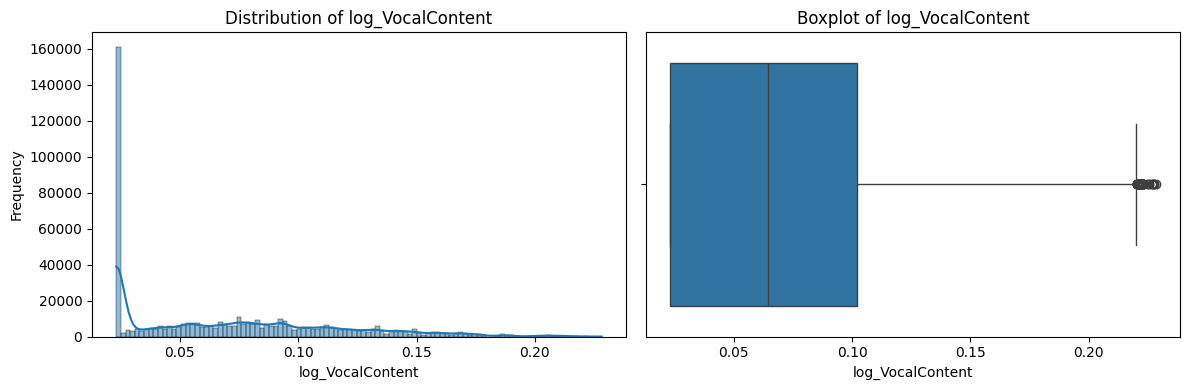

Skewness of log_VocalContent: 0.7083483375313513


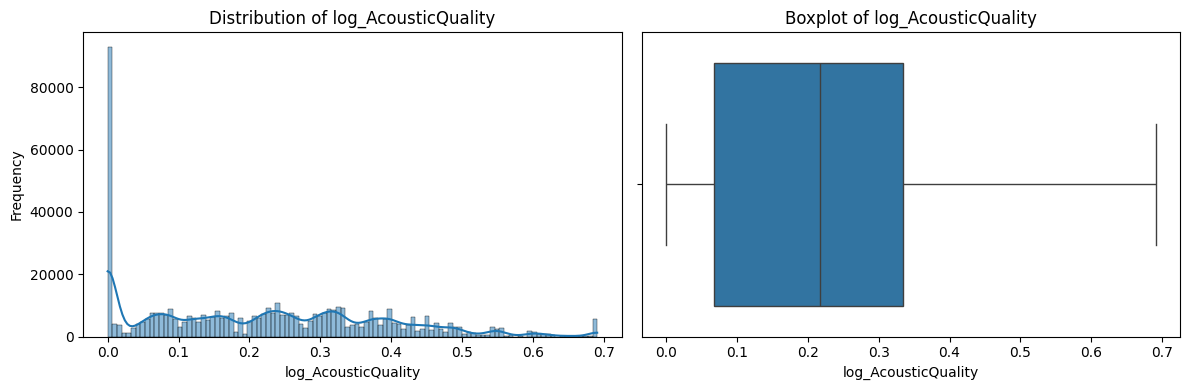

Skewness of log_AcousticQuality: 0.43025581475617375


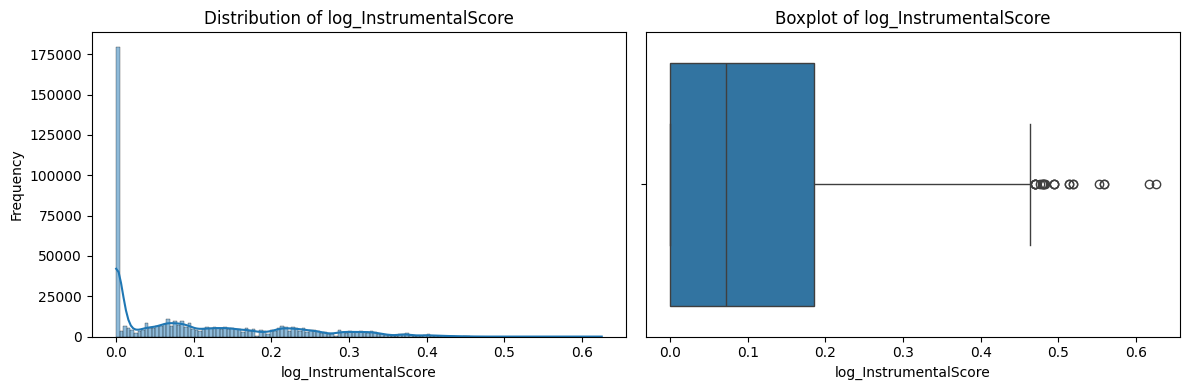

Skewness of log_InstrumentalScore: 0.869733668662933


In [50]:
#feature engineering to improve quality

#log transform skewed features

skewed_cols = [col for col in num_cols if abs(train_df[col].skew()) > .5 and col != target]

for col in skewed_cols:
    train_df[f'log_{col}'] = np.log1p(train_df[col])

#re-evaluate distributions

for col in skewed_cols:
    plt.figure(figsize=(12,4))
    #distribution
    plt.subplot(1,2,1)
    sns.histplot(train_df[f'log_{col}'], kde=True)
    plt.title(f'Distribution of log_{col}')
    plt.xlabel(f'log_{col}')
    plt.ylabel('Frequency')
    #outlier check
    plt.subplot(1,2,2)
    sns.boxplot(x=train_df[f'log_{col}'])
    plt.title(f'Boxplot of log_{col}')
    plt.xlabel(f'log_{col}')
    
    plt.tight_layout()
    plt.show()
    plt.close()
    print(f'Skewness of log_{col}: {train_df[f"log_{col}"].skew()}')